# Imports and Helpers

In [1]:
import os
import glob
import pickle
import torch
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from utils import read_tiff, preprocess, Predictor, get_label

In [2]:
# ## Darkfield

# RetinaNet Runs
# tiff_paths = ['data_128', 'data_128', 'data_64', 'data_64', 'data_256', 'data_256', 'data_512', 'data_512']
# cfg_paths = ['run14', 'run8', 'run10', 'run11', 'run12', 'run13', 'retinanet_run1', 'retinanet_run2']
# trained_ons = ['preprocessed 128x128', 'raw 128x128', 'raw 64x64', 'preprocessed 64x64', 'raw 256x256', 'preprocessed 256x256', 'preprocessed 512x512', 'raw 512x512']
# preprocess_ffts = [True, False, False, True, False, True, True, False]  # Set to False for raw frames

# FRCNN Runs
# tiff_paths = ['data_64', 'data_64', 'data_128', 'data_128', 'data_256', 'data_256', 'data_512', 'data_512']
# cfg_paths = ['frcnn_run7', 'frcnn_run8', 'frcnn_run2', 'frcnn_run3', 'frcnn_run4', 'frcnn_run5', 'frcnn_run17', 'frcnn_run18']
# trained_ons = ['raw 64x64', 'preprocessed 64x64', 'raw 128x128', 'preprocessed 128x128', 'raw 256x256', 'preprocessed 256x256', 'preprocessed 512x512', 'raw 512x512']
# preprocess_ffts = [False, True, False, True, False, True, True, False]  # Set to False for raw frames

# Runs over all the sizes
# tiff_paths = ['data_64', 'data_64', 'data_final', 'data_final', 'data_256', 'data_256', 'data_512', 'data_512']
# cfg_paths = ['frcnn_run27', 'frcnn_run27', 'frcnn_run27', 'frcnn_run27', 'frcnn_run27', 'frcnn_run27', 'frcnn_run27', 'frcnn_run27']
# trained_ons = ['raw multisize', 'raw multisize', 'raw multisize', 'raw multisize', 'raw multisize', 'raw multisize', 'raw multisize', 'raw multisize']
# preprocess_ffts = [False, True, False, True, False, True, True, False]  # Set to False for raw frames


# ## Brightfield Runs

# FRCNN Runs
# tiff_paths = ['brightfield/data_64', 'brightfield/data_64', 'brightfield/data_128', 'brightfield/data_128', 'brightfield/data_256', 'brightfield/data_256', 'brightfield/data_512', 'brightfield/data_512']
# cfg_paths = ['frcnn_run15', 'frcnn_run16','frcnn_run13', 'frcnn_run14', 'frcnn_run9', 'frcnn_run10', 'frcnn_run11', 'frcnn_run12']
# trained_ons = ['preprocessed brightfield 64x64', 'raw brightfield 64x64', 'preprocessed brightfield 128x128', 'raw brightfield 128x128', 'preprocessed brightfield 256x256', 'raw brightfield 256x256', 'preprocessed brightfield 512x512', 'raw brightfield 512x512']
# preprocess_ffts = [True, False, True, False, True, False, True, False]  # Set to False for raw frames





# # Runs over all the sizes (brightfield)
# tiff_paths = ['brightfield/data_64', 'brightfield/data_64', 'brightfield/data_128', 'brightfield/data_128', 'brightfield/data_256', 'brightfield/data_256', 'brightfield/data_512', 'brightfield/data_512']
# cfg_paths = ['frcnn_run29', 'frcnn_run29', 'frcnn_run29', 'frcnn_run29', 'frcnn_run27', 'frcnn_run27', 'frcnn_run27', 'frcnn_run27']
# trained_ons = ['raw multisize', 'raw multisize', 'raw multisize', 'raw multisize', 'raw multisize', 'raw multisize', 'raw multisize', 'raw multisize']
# preprocess_ffts = [False, True, False, True, False, True, True, False]  # Set to False for raw frames





## Resnet 18 Runs (All)
# tiff_paths = ['data_512', 'data_512', 'data_256', 'data_256', 'data_512', 'data_512', 'data_256', 'data_256']
# cfg_paths = ['retinanet_run4', 'retinanet_run5', 'retinanet_run8', 'retinanet_run9','frcnn_run19', 'frcnn_run20', 'frcnn_run23', 'frcnn_run24']
# trained_ons = ['raw 512x512', 'preprocessed 512x512', 'raw 256x256', 'preprocessed 256x256', 'raw 512x512', 'preprocessed 512x512', 'raw 256x256', 'preprocessed 256x256']
# preprocess_ffts = [False, True, False, True, False, True, False, True]  # Set to False for raw frames

# ## Resnet 18 Runs (5000 iters)
# tiff_paths = ['data_256', 'data_256']
# cfg_paths = ['retinanet_run8', 'retinanet_run9']
# trained_ons = ['raw 256x256', 'preprocessed 256x256']
# preprocess_ffts = [False, True]



# Custom
# tiff_paths = ['brightfield/data_512']
# cfg_paths = ['frcnn_run4']
# trained_ons = ['raw 256x256']
# preprocess_ffts = [False]  # Set to False for raw frames

In [3]:
# # ## Brightfield 2

# # # FRCNN Runs
# tiff_paths = ['brightfield2/data_64', 'brightfield2/data_64', 'brightfield2/data_128', 'brightfield2/data_128', 'brightfield2/data_256', 'brightfield2/data_256', 'brightfield2/data_512', 'brightfield2/data_512']
# cfg_paths = ['frcnn_run15', 'frcnn_run16','frcnn_run13', 'frcnn_run14', 'frcnn_run9', 'frcnn_run10', 'frcnn_run11', 'frcnn_run12']
# trained_ons = ['preprocessed brightfield 64x64', 'raw brightfield 64x64', 'preprocessed brightfield 128x128', 'raw brightfield 128x128', 'preprocessed brightfield 256x256', 'raw brightfield 256x256', 'preprocessed brightfield 512x512', 'raw brightfield 512x512']
# preprocess_ffts = [True, False, True, False, True, False, True, False]  # Set to False for raw frames

In [2]:
holdout_n_val = [
    '20190717_H9c2-G1_mCh-OMP_inFBS_1520_convtTL_018abl.tif',
    '20190717_H9c2-G1_mCh-OMP_inFBS_1520_convtTL_018abm.tif',
    '20190717_H9c2-G1_mCh-OMP_inFBS_1520_convtTL_018abn.tif',
    'MAX_20190717_H9c2-G1_mCh-OMP_inFBS_1520_convtTL_018aba.tif',
    'MAX_20190717_H9c2-G1_mCh-OMP_inFBS_1520_convtTL_018abb.tif',
    'MAX_20190717_H9c2-G1_mCh-OMP_inFBS_1520_convtTL_018abc.tif',
    'MAX_20190717_H9c2-G1_mCh-OMP_inFBS_1520_convtTL_018abd.tif',
    'MAX_20190717_H9c2-G1_mCh-OMP_inFBS_1520_convtTL_018abe.tif',
    '20190717_H9c2-G1_mCh-OMP_inFBS_1520_convtTL_018aba.tif',
    '20190717_H9c2-G1_mCh-OMP_inFBS_1520_convtTL_018abb.tif',
    '20190717_H9c2-G1_mCh-OMP_inFBS_1520_convtTL_018abc.tif',
    '20190717_H9c2-G1_mCh-OMP_inFBS_1520_convtTL_018abd.tif',
    '20190717_H9c2-G1_mCh-OMP_inFBS_1520_convtTL_018abe.tif',
    '20190717_H9c2-G1_mCh-OMP_inFBS_1520_convtTL_018abf.tif',
    '20190717_H9c2-G1_mCh-OMP_inFBS_1520_convtTL_018abg.tif',
    '20190717_H9c2-G1_mCh-OMP_inFBS_1520_convtTL_018abh.tif',
    '20190717_H9c2-G1_mCh-OMP_inFBS_1520_convtTL_018abi.tif',
    '20190717_H9c2-G1_mCh-OMP_inFBS_1520_convtTL_018abj.tif',
    '20190717_H9c2-G1_mCh-OMP_inFBS_1520_convtTL_018abk.tif',
]  # 19 TIFFs = 1140 frames

# MAE on holdout + val set

1.

In [3]:
# #DEBUG
# # for tiff_path, cfg_path, trained_on, preprocess_fft in zip(tiff_paths, cfg_paths, trained_ons, preprocess_ffts):
# tiff_path, cfg_path, trained_on, preprocess_fft ='data_256', 'frcnn_run4', 'raw 256x256', False

# print(
#     '************************************************************\n'
#     f'[i] Model {cfg_path}, trained on {trained_on} '
#     f'train frames' + \
#     f'\n[i] Evaluating on {"preprocessed" if preprocess_fft else "raw"} '
#     f'{tiff_path.split("_")[1]}x{tiff_path.split("_")[1]} holdout + val frames'.replace('final', '128')
#      )    
# # Get holdout files
# df = pd.read_csv(os.path.join(tiff_path, 'labels.csv'))
# hold = [os.path.join(tiff_path, 'images', f) for f in holdout_n_val]
# holdout_df = df[df.file.apply(lambda x: x in hold)].reset_index(drop=True)

# # Load Model
# cfg = pickle.load(open(os.path.join('output', cfg_path, 'cfg.pkl'), 'rb'))
# p = Predictor(cfg, preprocess_fft=preprocess_fft)

# mae_delta_x, mae_delta_y, mae_delta, mae_r = p.eval_disc_MAE(holdout_df, warnings=False)

# # Free GPU Memory
# del p
# torch.cuda.empty_cache()
# print('************************************************************')

In [4]:
# Runs over all the sizes
tiff_paths = ['data_64', 'data_64', 'data_128', 'data_128', 'data_256', 'data_256', 'data_512', 'data_512']
cfg_paths = ['frcnn_run27', 'frcnn_run27', 'frcnn_run27', 'frcnn_run27', 'frcnn_run27', 'frcnn_run27', 'frcnn_run27', 'frcnn_run27']
trained_ons = ['raw multisize', 'raw multisize', 'raw multisize', 'raw multisize', 'raw multisize', 'raw multisize', 'raw multisize', 'raw multisize']
preprocess_ffts = [False, True, False, True, False, True, True, False]  # Set to False for raw frames

In [6]:
os.makedirs('errors', exist_ok=True)
for tiff_path, cfg_path, trained_on, preprocess_fft in zip(tiff_paths, cfg_paths, trained_ons, preprocess_ffts):
    
    ####### CREATE DIRECTORY FOR EACH MODEL AND SAVE ERRORS 
    os.makedirs(os.path.join('errors', tiff_path, "preprocessed" if preprocess_fft else "raw"), exist_ok=True)
    print(
        '************************************************************\n'
        f'[i] Model {cfg_path}, trained on {trained_on} '
        f'train frames' + \
        f'\n[i] Evaluating on {"preprocessed" if preprocess_fft else "raw"} '
        f'{tiff_path.split("_")[1]}x{tiff_path.split("_")[1]} holdout + val frames'.replace('final', '128')
         )
    
    # Get holdout files
    df = pd.read_csv(os.path.join(tiff_path, 'labels.csv'))
    hold = [os.path.join(tiff_path, 'images', f) for f in holdout_n_val]
    holdout_df = df[df.file.apply(lambda x: x in hold)].reset_index(drop=True)
    
    # Load Model
    cfg = pickle.load(open(os.path.join('output', cfg_path, 'cfg.pkl'), 'rb'))
    cfg.MODEL.RPN.BBOX_REG_LOSS_WEIGHT = 1.0
    cfg.MODEL.RPN.BBOX_REG_LOSS_TYPE = "smooth_l1"
    cfg.MODEL.ROI_BOX_HEAD.BBOX_REG_LOSS_WEIGHT = 1.0
    cfg.MODEL.ROI_BOX_HEAD.BBOX_REG_LOSS_TYPE = "smooth_l1"
    
    p = Predictor(cfg, preprocess_fft=preprocess_fft)
    
    mae_delta_x, mae_delta_y, mae_delta, mae_r = p.eval_disc_MAE(holdout_df, print_fivenum=True, warnings=False)
    
#     pickle.dump(mae_delta_x, open(os.path.join('errors', tiff_path, "preprocessed" if preprocess_fft else "raw", 'mae_delta_x.pkl'), 'wb'))
#     pickle.dump(mae_delta_y, open(os.path.join('errors', tiff_path, "preprocessed" if preprocess_fft else "raw", 'mae_delta_y.pkl'), 'wb'))
#     pickle.dump(mae_delta, open(os.path.join('errors', tiff_path, "preprocessed" if preprocess_fft else "raw", 'mae_delta.pkl'), 'wb'))
#     pickle.dump(mae_r, open(os.path.join('errors', tiff_path, "preprocessed" if preprocess_fft else "raw", 'mae_r.pkl'), 'wb'))
    
    # Free GPU Memory
    del p
    torch.cuda.empty_cache()
    print('************************************************************')

************************************************************
[i] Model frcnn_run27, trained on raw multisize train frames
[i] Evaluating on raw 64x64 holdout + val frames



Mean absolute error in delta_x: 1.7027806864408248 micrometers	 or 	 0.9271548634614127 pixels
Mean absolute error in delta_y: 1.1982685189478544 micrometers	 or 	 0.6483032365472925 pixels
Mean absolute error in delta: 1.1503069499225043 micrometers	 or 	 0.6248742625173684 pixels
Mean absolute error in r: 0.6550299646845709 micrometers	 or 	 0.35464538877140245 pixels
fivenum of error in delta_x: 
 [0.90447175 1.17035837 1.70897929 2.15367328 2.77663025] micrometers
	 or 	 [0.4949819  0.64349449 0.93290024 1.0997751  1.5008724 ] pixels
fivenum of error in delta_y: [0.7105225  0.85435458 0.98315699 1.47419432 2.41878896] micrometers	 or 	 [0.40877714 0.47554404 0.54038984 0.78556529 1.29155512] pixels
fivenum of error in delta: [0.59825736 0.79855148 1.01074476 1.34126008 2.04894077] micrometers	 or 	 [0.34418887 0.43838771 0.54533955 0.73506257 1.10597644] pixels
fivenum of error in r: [0.23742967 0.36103544 0.58507668 0.90459386 1.5346388 ] micrometers	 or 	 [0.13599155 0.19837978 


Mean absolute error in delta_x: 2.0651951295836994 micrometers	 or 	 1.127512942077765 pixels
Mean absolute error in delta_y: 1.3905967202606282 micrometers	 or 	 0.7565820782084273 pixels
Mean absolute error in delta: 1.6588243959114284 micrometers	 or 	 0.9034944315592133 pixels
Mean absolute error in r: 1.6504012426405323 micrometers	 or 	 0.8962596495619933 pixels
fivenum of error in delta_x: 
 [1.00560833 1.48491237 1.91488621 2.20040147 4.59239263] micrometers
	 or 	 [0.57975027 0.79443548 1.04530103 1.19261902 2.54397667] pixels
fivenum of error in delta_y: [0.68362781 1.01816361 1.37441054 1.59868317 2.61724081] micrometers	 or 	 [0.40438145 0.55832599 0.74187878 0.85807053 1.39752199] pixels
fivenum of error in delta: [0.80301466 1.04198309 1.33946377 1.94009794 4.7980254 ] micrometers	 or 	 [0.44688465 0.56981042 0.72269735 1.0377115  2.56199047] pixels
fivenum of error in r: [0.34257081 1.17533899 1.46746601 1.98312812 4.83286308] micrometers	 or 	 [0.18794004 0.65838977 0.


Mean absolute error in delta_x: 1.3752658638105004 micrometers	 or 	 1.5025797464898474 pixels
Mean absolute error in delta_y: 0.8843266043396646 micrometers	 or 	 0.9622157429815053 pixels
Mean absolute error in delta: 0.9312293140713038 micrometers	 or 	 1.0145727947889558 pixels
Mean absolute error in r: 0.591842091982485 micrometers	 or 	 0.6440370855107663 pixels
fivenum of error in delta_x: 
 [0.48836315 0.87923762 1.34566717 1.59375903 3.58584992] micrometers
	 or 	 [0.52207795 0.93822073 1.40676294 1.75427876 3.98180684] pixels
fivenum of error in delta_y: [0.41771725 0.64019327 0.85657227 1.13690662 1.57795545] micrometers	 or 	 [0.44655491 0.68142404 0.922171   1.19025347 1.75219653] pixels
fivenum of error in delta: [0.32277726 0.66053515 0.92435133 1.17417274 1.5970743 ] micrometers	 or 	 [0.34140648 0.71821387 1.0148277  1.27115392 1.77680435] pixels
fivenum of error in r: [0.13237113 0.46011838 0.58518474 0.79596288 0.91100122] micrometers	 or 	 [0.14001098 0.48585205 0.


Mean absolute error in delta_x: 1.3931781280284876 micrometers	 or 	 1.516028294840861 pixels
Mean absolute error in delta_y: 1.0319234343922115 micrometers	 or 	 1.1256102137552673 pixels
Mean absolute error in delta: 1.2953353176178817 micrometers	 or 	 1.4148290071009648 pixels
Mean absolute error in r: 1.2395935496856705 micrometers	 or 	 1.355672011309886 pixels
fivenum of error in delta_x: 
 [0.55892377 0.89019549 1.33804475 1.66894675 2.53385204] micrometers
	 or 	 [0.59750981 0.94925325 1.50566873 1.84942895 2.81364518] pixels
fivenum of error in delta_y: [0.38418505 0.63231512 1.07781192 1.32889202 1.92495313] micrometers	 or 	 [0.41070778 0.67214573 1.17645567 1.39841739 2.26155888] pixels
fivenum of error in delta: [0.3451229  0.78538899 1.11351802 1.82030537 2.76257723] micrometers	 or 	 [0.36504181 0.87071066 1.21909591 1.90157694 3.24565361] pixels
fivenum of error in r: [0.28384144 0.67410804 1.1032637  1.71067361 2.66533972] micrometers	 or 	 [0.30022347 0.74061055 1.1


Mean absolute error in delta_x: 0.9991273399547392 micrometers	 or 	 2.171350657337233 pixels
Mean absolute error in delta_y: 0.7483430848901435 micrometers	 or 	 1.6248201850174606 pixels
Mean absolute error in delta: 0.9271730262126429 micrometers	 or 	 2.017351109029864 pixels
Mean absolute error in r: 0.6017567017668168 micrometers	 or 	 1.3047075339007872 pixels
fivenum of error in delta_x: 
 [0.15996182 0.61291269 1.03693636 1.38415933 1.87600541] micrometers
	 or 	 [0.36754664 1.29192503 2.17827556 3.13205014 4.09821743] pixels
fivenum of error in delta_y: [0.23725092 0.47847162 0.84668834 0.95981713 1.34308101] micrometers	 or 	 [0.52730822 1.05493627 1.84962841 2.09332802 2.79780679] pixels
fivenum of error in delta: [0.17367806 0.64395523 1.07180618 1.18576631 1.79840058] micrometers	 or 	 [0.38362991 1.43033504 2.34034325 2.58969947 4.13739272] pixels
fivenum of error in r: [0.10753979 0.40501775 0.64298923 0.77204951 1.20409795] micrometers	 or 	 [0.24684793 0.89693434 1.4


Mean absolute error in delta_x: 0.772394873631107 micrometers	 or 	 1.6974632307182471 pixels
Mean absolute error in delta_y: 0.395498201609549 micrometers	 or 	 0.8686565741434834 pixels
Mean absolute error in delta: 0.48050253102377133 micrometers	 or 	 1.058302141245813 pixels
Mean absolute error in r: 0.3113037014926394 micrometers	 or 	 0.6890962658214351 pixels
fivenum of error in delta_x: 
 [0.30090213 0.36913671 0.67583282 1.25298978 1.30309359] micrometers
	 or 	 [0.69138725 0.75384029 1.48567493 2.77716204 2.90503854] pixels
fivenum of error in delta_y: [0.24629701 0.28813109 0.29969902 0.36425044 1.03925354] micrometers	 or 	 [0.53370214 0.61271103 0.64309602 0.80470513 2.39090227] pixels
fivenum of error in delta: [0.26324688 0.31173387 0.34192652 0.44607951 1.50235812] micrometers	 or 	 [0.55351917 0.6630316  0.76276018 1.01029663 3.45631868] pixels
fivenum of error in r: [0.13349211 0.17634276 0.20705571 0.22548067 1.58666405] micrometers	 or 	 [0.28037828 0.3955732  0.4


Mean absolute error in delta_x: 0.8558833524174241 micrometers	 or 	 3.7022312324791633 pixels
Mean absolute error in delta_y: 0.4918191092653474 micrometers	 or 	 2.1255095662798587 pixels
Mean absolute error in delta: 0.7428493696472809 micrometers	 or 	 3.2309976151557422 pixels
Mean absolute error in r: 0.5486892988663619 micrometers	 or 	 2.3642010590707403 pixels
fivenum of error in delta_x: 
 [0.29159363 0.44802125 0.7962319  1.31130017 1.45097005] micrometers
	 or 	 [1.2037705  1.86650601 3.54355671 5.63542282 6.83057465] pixels
fivenum of error in delta_y: [0.20785533 0.39787056 0.47452599 0.57088986 0.91999969] micrometers	 or 	 [0.85807815 1.6278324  2.08732421 2.50252266 4.07047444] pixels
fivenum of error in delta: [0.24374012 0.44734164 0.65162085 0.93247383 1.73906551] micrometers	 or 	 [1.0062194  1.84747116 2.7678448  4.06735094 7.69437398] pixels
fivenum of error in r: [0.20050811 0.30675725 0.44306912 0.65819229 1.33083178] micrometers	 or 	 [0.82774699 1.24056532 1


Mean absolute error in delta_x: 1.390160528970095 micrometers	 or 	 5.981062765441486 pixels
Mean absolute error in delta_y: 0.8463063854514583 micrometers	 or 	 3.62944906288361 pixels
Mean absolute error in delta: 1.3077982630076488 micrometers	 or 	 5.617190621347132 pixels
Mean absolute error in r: 0.9850716068444684 micrometers	 or 	 4.204950598495325 pixels
fivenum of error in delta_x: 
 [0.24111624 1.0344251  1.2885702  1.79324088 2.37128699] micrometers
	 or 	 [ 0.9614448   4.46307286  5.40103035  7.8232532  10.07235172] pixels
fivenum of error in delta_y: [0.19334285 0.80196719 0.87453158 0.95461763 1.22954154] micrometers	 or 	 [0.77094964 3.33634562 3.73195823 4.25416968 5.26654558] pixels
fivenum of error in delta: [0.22635272 1.20691726 1.30954308 1.53370138 1.97120975] micrometers	 or 	 [0.90257564 4.90693396 5.68325474 6.6635982  8.72147997] pixels
fivenum of error in r: [0.18112935 0.92141107 1.02496295 1.11752284 1.46680996] micrometers	 or 	 [0.80904937 3.96582224 4.

In [11]:
# FRCNN Runs
tiff_paths = ['data_64', 'data_64', 'data_128', 'data_128', 'data_256', 'data_256', 'data_512', 'data_512']
cfg_paths = ['frcnn_run7', 'frcnn_run8', 'frcnn_run2', 'frcnn_run3', 'frcnn_run4', 'frcnn_run5', 'frcnn_run17', 'frcnn_run18']
trained_ons = ['raw 64x64', 'preprocessed 64x64', 'raw 128x128', 'preprocessed 128x128', 'raw 256x256', 'preprocessed 256x256', 'preprocessed 512x512', 'raw 512x512']
preprocess_ffts = [False, True, False, True, False, True, True, False]  # Set to False for raw frames

In [12]:
os.makedirs('errors_complete', exist_ok=True)
for tiff_path, cfg_path, trained_on, preprocess_fft in zip(tiff_paths, cfg_paths, trained_ons, preprocess_ffts):
    
    ####### CREATE DIRECTORY FOR EACH MODEL AND SAVE ERRORS 
    os.makedirs(os.path.join('errors_complete', tiff_path, "preprocessed" if preprocess_fft else "raw"), exist_ok=True)
    print(
        '************************************************************\n'
        f'[i] Model {cfg_path}, trained on {trained_on} '
        f'train frames' + \
        f'\n[i] Evaluating on {"preprocessed" if preprocess_fft else "raw"} '
        f'{tiff_path.split("_")[1]}x{tiff_path.split("_")[1]} holdout + val frames'.replace('final', '128')
         )
    
    # Get holdout files
    df = pd.read_csv(os.path.join(tiff_path, 'labels.csv'))
    hold = [os.path.join(tiff_path, 'images', f) for f in holdout_n_val]
    holdout_df = df[df.file.apply(lambda x: x in hold)].reset_index(drop=True)
    
    # Load Model
    cfg = pickle.load(open(os.path.join('output', cfg_path, 'cfg.pkl'), 'rb'))
    cfg.MODEL.RPN.BBOX_REG_LOSS_WEIGHT = 1.0
    cfg.MODEL.RPN.BBOX_REG_LOSS_TYPE = "smooth_l1"
    cfg.MODEL.ROI_BOX_HEAD.BBOX_REG_LOSS_WEIGHT = 1.0
    cfg.MODEL.ROI_BOX_HEAD.BBOX_REG_LOSS_TYPE = "smooth_l1"
    
    p = Predictor(cfg, preprocess_fft=preprocess_fft)
    
    mae_delta_x, mae_delta_y, mae_delta, mae_r = p.eval_disc_MAE(holdout_df, print_fivenum=True, warnings=False)
    
    pickle.dump(mae_delta_x, open(os.path.join('errors_complete', tiff_path, "preprocessed" if preprocess_fft else "raw", 'mae_delta_x.pkl'), 'wb'))
    pickle.dump(mae_delta_y, open(os.path.join('errors_complete', tiff_path, "preprocessed" if preprocess_fft else "raw", 'mae_delta_y.pkl'), 'wb'))
    pickle.dump(mae_delta, open(os.path.join('errors_complete', tiff_path, "preprocessed" if preprocess_fft else "raw", 'mae_delta.pkl'), 'wb'))
    pickle.dump(mae_r, open(os.path.join('errors_complete', tiff_path, "preprocessed" if preprocess_fft else "raw", 'mae_r.pkl'), 'wb'))
    
    # Free GPU Memory
    del p
    torch.cuda.empty_cache()
    print('************************************************************')

************************************************************
[i] Model frcnn_run7, trained on raw 64x64 train frames
[i] Evaluating on raw 64x64 holdout + val frames



************************************************************
************************************************************
[i] Model frcnn_run8, trained on preprocessed 64x64 train frames
[i] Evaluating on preprocessed 64x64 holdout + val frames



************************************************************
************************************************************
[i] Model frcnn_run2, trained on raw 128x128 train frames
[i] Evaluating on raw 128x128 holdout + val frames



************************************************************
************************************************************
[i] Model frcnn_run3, trained on preprocessed 128x128 train frames
[i] Evaluating on preprocessed 128x128 holdout + val frames



************************************************************
************************************************************
[i] Model frcnn_run4, trained on raw 256x256 train frames
[i] Evaluating on raw 256x256 holdout + val frames



************************************************************
************************************************************
[i] Model frcnn_run5, trained on preprocessed 256x256 train frames
[i] Evaluating on preprocessed 256x256 holdout + val frames



************************************************************
************************************************************
[i] Model frcnn_run17, trained on preprocessed 512x512 train frames
[i] Evaluating on preprocessed 512x512 holdout + val frames



************************************************************
************************************************************
[i] Model frcnn_run18, trained on raw 512x512 train frames
[i] Evaluating on raw 512x512 holdout + val frames



************************************************************


In [13]:
# # ## Brightfield 2

# # # FRCNN Runs
tiff_paths = ['brightfield2/data_64', 'brightfield2/data_64', 'brightfield2/data_128', 'brightfield2/data_128', 'brightfield2/data_256', 'brightfield2/data_256', 'brightfield2/data_512', 'brightfield2/data_512']
cfg_paths = ['frcnn_run15', 'frcnn_run16','frcnn_run13', 'frcnn_run14', 'frcnn_run9', 'frcnn_run10', 'frcnn_run11', 'frcnn_run12']
trained_ons = ['preprocessed brightfield 64x64', 'raw brightfield 64x64', 'preprocessed brightfield 128x128', 'raw brightfield 128x128', 'preprocessed brightfield 256x256', 'raw brightfield 256x256', 'preprocessed brightfield 512x512', 'raw brightfield 512x512']
preprocess_ffts = [True, False, True, False, True, False, True, False]  # Set to False for raw frames

In [14]:
os.makedirs('errors_complete', exist_ok=True)
for tiff_path, cfg_path, trained_on, preprocess_fft in zip(tiff_paths, cfg_paths, trained_ons, preprocess_ffts):
    
    ####### CREATE DIRECTORY FOR EACH MODEL AND SAVE ERRORS 
    os.makedirs(os.path.join('errors_complete', tiff_path, "preprocessed" if preprocess_fft else "raw"), exist_ok=True)
    print(
        '************************************************************\n'
        f'[i] Model {cfg_path}, trained on {trained_on} '
        f'train frames' + \
        f'\n[i] Evaluating on {"preprocessed" if preprocess_fft else "raw"} '
        f'{tiff_path.split("_")[1]}x{tiff_path.split("_")[1]} holdout + val frames'.replace('final', '128')
         )
    
    # Get holdout files
    df = pd.read_csv(os.path.join(tiff_path, 'labels.csv'))
    hold = [os.path.join(tiff_path, 'images', f) for f in holdout_n_val]
    holdout_df = df[df.file.apply(lambda x: x in hold)].reset_index(drop=True)
    
    # Load Model
    cfg = pickle.load(open(os.path.join('output', cfg_path, 'cfg.pkl'), 'rb'))
    cfg.MODEL.RPN.BBOX_REG_LOSS_WEIGHT = 1.0
    cfg.MODEL.RPN.BBOX_REG_LOSS_TYPE = "smooth_l1"
    cfg.MODEL.ROI_BOX_HEAD.BBOX_REG_LOSS_WEIGHT = 1.0
    cfg.MODEL.ROI_BOX_HEAD.BBOX_REG_LOSS_TYPE = "smooth_l1"
    
    p = Predictor(cfg, preprocess_fft=preprocess_fft)
    
    mae_delta_x, mae_delta_y, mae_delta, mae_r = p.eval_disc_MAE(holdout_df, print_fivenum=True, warnings=False)
    
    pickle.dump(mae_delta_x, open(os.path.join('errors_complete', tiff_path, "preprocessed" if preprocess_fft else "raw", 'mae_delta_x.pkl'), 'wb'))
    pickle.dump(mae_delta_y, open(os.path.join('errors_complete', tiff_path, "preprocessed" if preprocess_fft else "raw", 'mae_delta_y.pkl'), 'wb'))
    pickle.dump(mae_delta, open(os.path.join('errors_complete', tiff_path, "preprocessed" if preprocess_fft else "raw", 'mae_delta.pkl'), 'wb'))
    pickle.dump(mae_r, open(os.path.join('errors_complete', tiff_path, "preprocessed" if preprocess_fft else "raw", 'mae_r.pkl'), 'wb'))
    
    # Free GPU Memory
    del p
    torch.cuda.empty_cache()
    print('************************************************************')

************************************************************
[i] Model frcnn_run15, trained on preprocessed brightfield 64x64 train frames
[i] Evaluating on preprocessed 64x64 holdout + val frames



************************************************************
************************************************************
[i] Model frcnn_run16, trained on raw brightfield 64x64 train frames
[i] Evaluating on raw 64x64 holdout + val frames



************************************************************
************************************************************
[i] Model frcnn_run13, trained on preprocessed brightfield 128x128 train frames
[i] Evaluating on preprocessed 128x128 holdout + val frames



************************************************************
************************************************************
[i] Model frcnn_run14, trained on raw brightfield 128x128 train frames
[i] Evaluating on raw 128x128 holdout + val frames



************************************************************
************************************************************
[i] Model frcnn_run9, trained on preprocessed brightfield 256x256 train frames
[i] Evaluating on preprocessed 256x256 holdout + val frames



************************************************************
************************************************************
[i] Model frcnn_run10, trained on raw brightfield 256x256 train frames
[i] Evaluating on raw 256x256 holdout + val frames



************************************************************
************************************************************
[i] Model frcnn_run11, trained on preprocessed brightfield 512x512 train frames
[i] Evaluating on preprocessed 512x512 holdout + val frames



************************************************************
************************************************************
[i] Model frcnn_run12, trained on raw brightfield 512x512 train frames
[i] Evaluating on raw 512x512 holdout + val frames



************************************************************


In [15]:
# ## Brightfield Runs

# FRCNN Runs
tiff_paths = ['brightfield/data_64', 'brightfield/data_64', 'brightfield/data_128', 'brightfield/data_128', 'brightfield/data_256', 'brightfield/data_256', 'brightfield/data_512', 'brightfield/data_512']
cfg_paths = ['frcnn_run15', 'frcnn_run16','frcnn_run13', 'frcnn_run14', 'frcnn_run9', 'frcnn_run10', 'frcnn_run11', 'frcnn_run12']
trained_ons = ['preprocessed brightfield 64x64', 'raw brightfield 64x64', 'preprocessed brightfield 128x128', 'raw brightfield 128x128', 'preprocessed brightfield 256x256', 'raw brightfield 256x256', 'preprocessed brightfield 512x512', 'raw brightfield 512x512']
preprocess_ffts = [True, False, True, False, True, False, True, False]  # Set to False for raw frames


In [16]:
os.makedirs('errors_complete', exist_ok=True)
for tiff_path, cfg_path, trained_on, preprocess_fft in zip(tiff_paths, cfg_paths, trained_ons, preprocess_ffts):
    
    ####### CREATE DIRECTORY FOR EACH MODEL AND SAVE ERRORS 
    os.makedirs(os.path.join('errors_complete', tiff_path, "preprocessed" if preprocess_fft else "raw"), exist_ok=True)
    print(
        '************************************************************\n'
        f'[i] Model {cfg_path}, trained on {trained_on} '
        f'train frames' + \
        f'\n[i] Evaluating on {"preprocessed" if preprocess_fft else "raw"} '
        f'{tiff_path.split("_")[1]}x{tiff_path.split("_")[1]} holdout + val frames'.replace('final', '128')
         )
    
    # Get holdout files
    df = pd.read_csv(os.path.join(tiff_path, 'labels.csv'))
    hold = [os.path.join(tiff_path, 'images', f) for f in holdout_n_val]
    holdout_df = df[df.file.apply(lambda x: x in hold)].reset_index(drop=True)
    
    # Load Model
    cfg = pickle.load(open(os.path.join('output', cfg_path, 'cfg.pkl'), 'rb'))
    cfg.MODEL.RPN.BBOX_REG_LOSS_WEIGHT = 1.0
    cfg.MODEL.RPN.BBOX_REG_LOSS_TYPE = "smooth_l1"
    cfg.MODEL.ROI_BOX_HEAD.BBOX_REG_LOSS_WEIGHT = 1.0
    cfg.MODEL.ROI_BOX_HEAD.BBOX_REG_LOSS_TYPE = "smooth_l1"
    
    p = Predictor(cfg, preprocess_fft=preprocess_fft)
    
    mae_delta_x, mae_delta_y, mae_delta, mae_r = p.eval_disc_MAE(holdout_df, print_fivenum=True, warnings=False)
    
    pickle.dump(mae_delta_x, open(os.path.join('errors_complete', tiff_path, "preprocessed" if preprocess_fft else "raw", 'mae_delta_x.pkl'), 'wb'))
    pickle.dump(mae_delta_y, open(os.path.join('errors_complete', tiff_path, "preprocessed" if preprocess_fft else "raw", 'mae_delta_y.pkl'), 'wb'))
    pickle.dump(mae_delta, open(os.path.join('errors_complete', tiff_path, "preprocessed" if preprocess_fft else "raw", 'mae_delta.pkl'), 'wb'))
    pickle.dump(mae_r, open(os.path.join('errors_complete', tiff_path, "preprocessed" if preprocess_fft else "raw", 'mae_r.pkl'), 'wb'))
    
    # Free GPU Memory
    del p
    torch.cuda.empty_cache()
    print('************************************************************')

************************************************************
[i] Model frcnn_run15, trained on preprocessed brightfield 64x64 train frames
[i] Evaluating on preprocessed 64x64 holdout + val frames



************************************************************
************************************************************
[i] Model frcnn_run16, trained on raw brightfield 64x64 train frames
[i] Evaluating on raw 64x64 holdout + val frames



************************************************************
************************************************************
[i] Model frcnn_run13, trained on preprocessed brightfield 128x128 train frames
[i] Evaluating on preprocessed 128x128 holdout + val frames



************************************************************
************************************************************
[i] Model frcnn_run14, trained on raw brightfield 128x128 train frames
[i] Evaluating on raw 128x128 holdout + val frames



************************************************************
************************************************************
[i] Model frcnn_run9, trained on preprocessed brightfield 256x256 train frames
[i] Evaluating on preprocessed 256x256 holdout + val frames



************************************************************
************************************************************
[i] Model frcnn_run10, trained on raw brightfield 256x256 train frames
[i] Evaluating on raw 256x256 holdout + val frames



************************************************************
************************************************************
[i] Model frcnn_run11, trained on preprocessed brightfield 512x512 train frames
[i] Evaluating on preprocessed 512x512 holdout + val frames



************************************************************
************************************************************
[i] Model frcnn_run12, trained on raw brightfield 512x512 train frames
[i] Evaluating on raw 512x512 holdout + val frames



************************************************************


2.

In [13]:
for tiff_path, cfg_path, trained_on, preprocess_fft in zip(tiff_paths, cfg_paths, trained_ons, preprocess_ffts):
    print(
        '************************************************************\n'
        f'[i] Model {cfg_path}, trained on {trained_on} '
        f'train frames' + \
        f'\n[i] Evaluating on {"preprocessed" if not preprocess_fft else "raw"} '
        f'{tiff_path.split("_")[1]}x{tiff_path.split("_")[1]} holdout + val frames'.replace('final', '128')
         )    
    # Get holdout files
    df = pd.read_csv(os.path.join(tiff_path, 'labels.csv'))
    hold = [os.path.join(tiff_path, 'images', f) for f in holdout_n_val]
    holdout_df = df[df.file.apply(lambda x: x in hold)].reset_index(drop=True)
    
    # Load Model
    cfg = pickle.load(open(os.path.join('output', cfg_path, 'cfg.pkl'), 'rb'))
    p = Predictor(cfg, preprocess_fft=not preprocess_fft)
    
    _ = p.eval_disc_MAE(holdout_df, print_fivenum=True, warnings=False)
        
    # Free GPU Memory
    del p
    torch.cuda.empty_cache()
    print('************************************************************')

************************************************************
[i] Model frcnn_run15, trained on preprocessed brightfield 64x64 train frames
[i] Evaluating on raw 64x64 holdout + val frames



Mean absolute error in delta_x: 11.410563291670377 micrometers	 or 	 6.178797697801031 pixels
Mean absolute error in delta_y: 9.251909214340852 micrometers	 or 	 4.988974750243974 pixels
Mean absolute error in r: 11.513759808315188 micrometers	 or 	 6.215573761011573 pixels
fivenum of error in delta_x: 
 [ 8.28859228 10.11796755 10.76651999 12.81724376 16.14771974] micrometers
	 or 	 [4.17529274 5.44471264 5.89283035 6.77682556 9.06940137] pixels
fivenum of error in delta_y: [ 6.55910204  9.06727083  9.2707736   9.56514954 10.75078771] micrometers	 or 	 [3.55939882 4.76938452 4.94732627 5.23757648 5.76655166] pixels
fivenum of error in r: [10.07712314 10.95779339 11.45586477 12.13002695 12.68009848] micrometers	 or 	 [5.31811826 5.75645247 6.32192212 6.51000664 7.44217319] pixels
************************************************************
************************************************************
[i] Model frcnn_run16, trained on raw brightfield 64x64 train frames
[i] Evaluating on


Mean absolute error in delta_x: 14.212231149390178 micrometers	 or 	 7.666234875484179 pixels
Mean absolute error in delta_y: 10.68658709101087 micrometers	 or 	 5.759702005751229 pixels
Mean absolute error in r: 14.477846652337107 micrometers	 or 	 7.812890041879478 pixels
fivenum of error in delta_x: 
 [11.03049961 13.09531832 14.51673289 15.25122697 17.00157184] micrometers
	 or 	 [5.98587231 7.01983649 7.8826097  8.23123706 8.92619065] pixels
fivenum of error in delta_y: [ 8.95590358 10.29867939 10.93091053 11.31625931 11.73761938] micrometers	 or 	 [4.86006048 5.56630599 5.76446097 6.02247403 6.32083548] pixels
fivenum of error in r: [12.62395689 13.82671107 14.68356456 15.0695704  15.51149869] micrometers	 or 	 [6.85058671 7.5211619  7.64802713 8.17494236 8.95579386] pixels
************************************************************
************************************************************
[i] Model frcnn_run13, trained on preprocessed brightfield 128x128 train frames
[i] Ev


Mean absolute error in delta_x: 10.057357002760781 micrometers	 or 	 10.92795698932697 pixels
Mean absolute error in delta_y: 8.702382637592217 micrometers	 or 	 9.48128264868303 pixels
Mean absolute error in r: 12.82674478196717 micrometers	 or 	 13.980208640869268 pixels
fivenum of error in delta_x: 
 [ 6.08577884  8.23904306  9.26526017 12.20633577 14.96416772] micrometers
	 or 	 [ 6.23378782  9.1487828  10.42735813 13.46316962 15.13900836] pixels
fivenum of error in delta_y: [ 5.39700667  7.42262058  8.95224127 10.01872436 11.30258203] micrometers	 or 	 [ 5.52826439  8.08080508  9.92818896 10.87359983 12.48042046] pixels
fivenum of error in r: [ 9.69543832 12.1489948  12.80919621 13.52393802 14.9354956 ] micrometers	 or 	 [ 9.9312359  13.71916444 14.14969908 14.75642197 16.34223924] pixels
************************************************************
************************************************************
[i] Model frcnn_run14, trained on raw brightfield 128x128 train frames
[


Mean absolute error in delta_x: 7.458348214050659 micrometers	 or 	 8.127647319036265 pixels
Mean absolute error in delta_y: 6.62150250313223 micrometers	 or 	 7.21960621903316 pixels
Mean absolute error in r: 11.282047912479173 micrometers	 or 	 12.281434272268646 pixels
fivenum of error in delta_x: 
 [ 1.45257688  3.99009125  6.78791707 11.43050584 12.98709513] micrometers
	 or 	 [ 1.48790423  4.25180559  7.80227733 11.96802194 15.01619637] pixels
fivenum of error in delta_y: [ 1.08178027  4.1766987   5.2558965   9.63390244 11.87963587] micrometers	 or 	 [ 1.10808967  4.49687277  5.98713005 10.39057154 13.73570789] pixels
fivenum of error in r: [ 5.63513627  8.4749682  11.61888792 14.57080226 16.12248808] micrometers	 or 	 [ 5.77218541  9.34286963 12.62992032 15.40698506 17.77483389] pixels
************************************************************
************************************************************
[i] Model frcnn_run9, trained on preprocessed brightfield 256x256 train f


Mean absolute error in delta_x: 10.25858860667274 micrometers	 or 	 22.130794976516277 pixels
Mean absolute error in delta_y: 9.393195614838504 micrometers	 or 	 20.343083785297022 pixels
Mean absolute error in r: 13.386181346159328 micrometers	 or 	 28.86490586000378 pixels
fivenum of error in delta_x: 
 [ 2.76631856  8.75417599  9.97979811 12.94957411 14.05374486] micrometers
	 or 	 [ 6.10577616 18.43873293 21.32797454 27.83737758 31.27934737] pixels
fivenum of error in delta_y: [ 1.09677447  7.94599575  9.74100148 12.3280119  14.24305406] micrometers	 or 	 [ 2.42078389 16.5465017  20.26329573 27.0505971  31.70069188] pixels
fivenum of error in r: [ 4.1165699  12.83172831 14.23055119 15.20140177 16.97280539] micrometers	 or 	 [ 9.08603032 27.03348662 30.01484049 34.07718495 37.77628532] pixels
************************************************************
************************************************************
[i] Model frcnn_run10, trained on raw brightfield 256x256 train frames


Mean absolute error in delta_x: 4.408141280296457 micrometers	 or 	 9.559260722940923 pixels
Mean absolute error in delta_y: 3.9498457003098006 micrometers	 or 	 8.614106071805816 pixels
Mean absolute error in r: 7.637375241148153 micrometers	 or 	 16.517921447895837 pixels
fivenum of error in delta_x: 
 [0.65429896 1.75781619 2.81022026 7.5584254  9.38312339] micrometers
	 or 	 [ 1.38451824  3.83361401  5.83493765 16.90601351 20.88628962] pixels
fivenum of error in delta_y: [0.64802787 1.48147603 2.67813788 6.74842219 8.76642065] micrometers	 or 	 [ 1.34004373  3.10013271  5.57108014 14.51243116 19.4740607 ] pixels
fivenum of error in r: [ 3.50438079  5.27533454  6.73374082 10.42363916 13.94297982] micrometers	 or 	 [ 7.73481585 11.04188698 13.91509851 22.95496756 30.97346639] pixels
************************************************************
************************************************************
[i] Model frcnn_run11, trained on preprocessed brightfield 512x512 train frames
[


Mean absolute error in delta_x: 7.267908043315163 micrometers	 or 	 31.472919159662464 pixels
Mean absolute error in delta_y: 7.131370526474852 micrometers	 or 	 30.794853609441002 pixels
Mean absolute error in r: 9.841616040213934 micrometers	 or 	 42.45523572118722 pixels
fivenum of error in delta_x: 
 [ 2.22543591  4.79312278  7.59552356  9.62783506 11.73212717] micrometers
	 or 	 [ 8.97010925 20.14050813 31.75741651 40.67136438 49.93070613] pixels
fivenum of error in delta_y: [ 3.40580634  6.36034916  7.02921763  8.3841551  10.88728652] micrometers	 or 	 [13.72785209 26.9776486  31.08094134 35.5730798  46.0902126 ] pixels
fivenum of error in r: [ 5.40634644  8.52698281 10.07651127 11.26637677 13.4649185 ] micrometers	 or 	 [21.79146929 37.12663473 44.08911139 49.53956889 57.30528479] pixels
************************************************************
************************************************************
[i] Model frcnn_run12, trained on raw brightfield 512x512 train frames



Mean absolute error in delta_x: 5.669700495821641 micrometers	 or 	 24.584916367013108 pixels
Mean absolute error in delta_y: 6.159685650145091 micrometers	 or 	 26.63220321030542 pixels
Mean absolute error in r: 9.403905911139008 micrometers	 or 	 40.549514051257084 pixels
fivenum of error in delta_x: 
 [0.68179281 3.59039393 6.31750041 7.51204126 9.64071318] micrometers
	 or 	 [ 2.748116   15.05464401 26.63008919 33.33220599 41.02986693] pixels
fivenum of error in delta_y: [2.16967487 5.37078759 6.50279638 7.40020698 9.97273023] micrometers	 or 	 [ 8.74535214 23.03899264 27.41219409 31.25436446 42.2185322 ] pixels
fivenum of error in r: [ 5.10876109  8.00556755  9.39899784 10.96743854 13.09326051] micrometers	 or 	 [20.59198606 34.60090316 41.7541345  46.23178694 55.72354727] pixels
************************************************************


# Visualize locations of discs


Visualizing predictions...


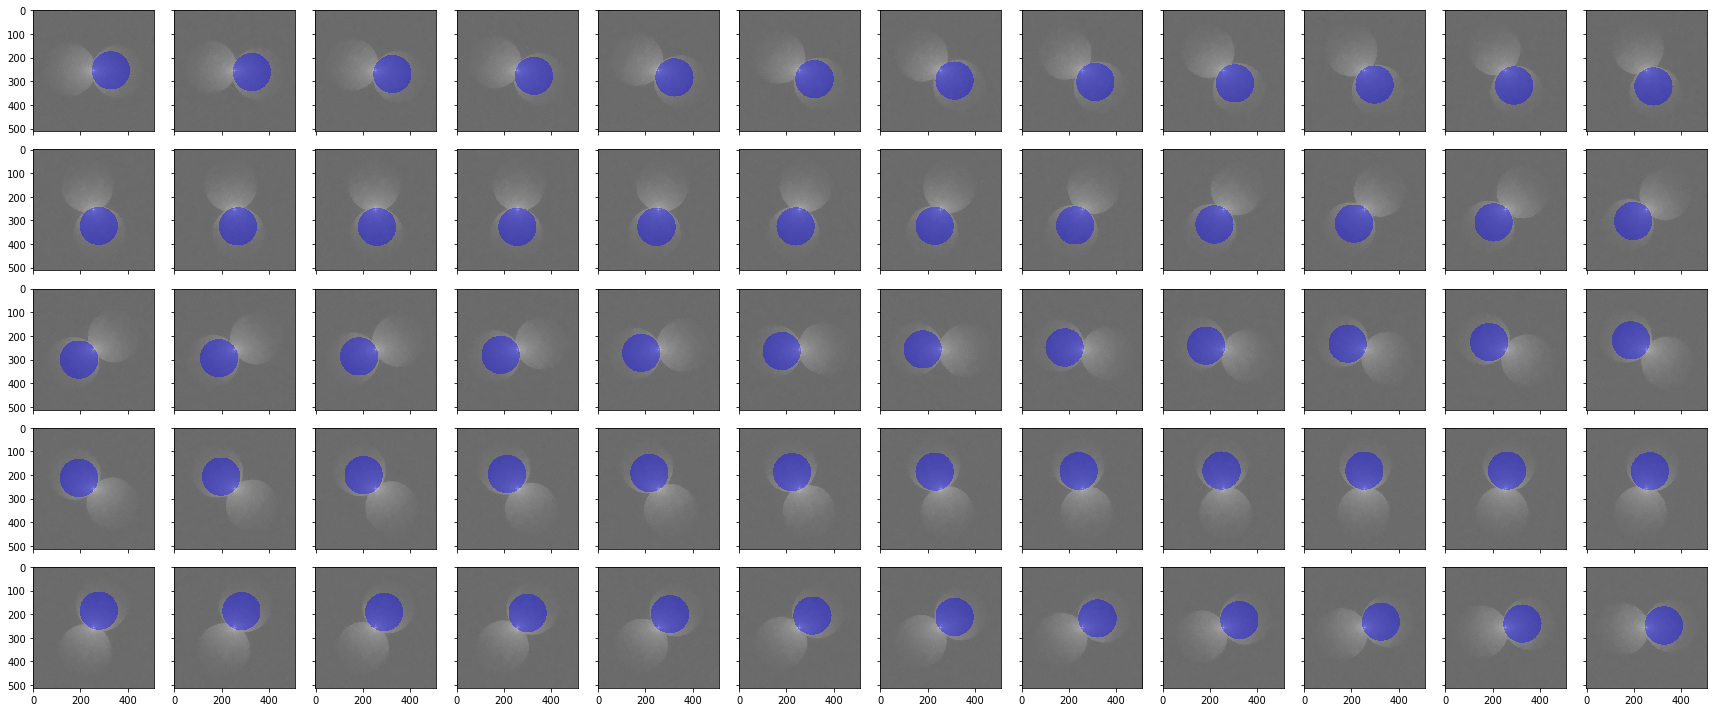

In [7]:
i = 6  # ith model in tiff_paths list
k = 0 # Any integer between [0, 246]
# Validation Indices: [62, 10, 50, 17, 44, 61, 63, 45, 3, 60, 12]
# Holdout Indices: [43, 41, 4, 64, 13, 0, 70, 7]

df = pd.read_csv(os.path.join(tiff_paths[i], 'labels.csv'))
files = glob.glob(os.path.join(tiff_paths[i], 'images', '*.tif')) + glob.glob(os.path.join(tiff_paths[i], 'images', '*.tiff'))  # List all tiff files
file = files[k]  # Choose kth tiff file
row = df[df.file==file]

# Load Model
cfg = pickle.load(open(os.path.join('output', cfg_paths[i], 'cfg.pkl'), 'rb'))
p = Predictor(cfg, preprocess_fft=preprocess_ffts[i])


# Predict on the chosen tiff file
discs, r = p.get_disc(
    tiff_path=file,
    visualize=True,
    warnings=False
)

# Calculate MAE for k0x and k0y values

In [6]:
metadata = {
    'PIXELSIZE': row.PIXELSIZE,
    'IMAGESIZE': row.IMAGESIZE,
    'RI': row.RI,
    'MAGNIFICATION': row.MAGNIFICATION,
    'ILLUMINATION_OFFCENTER_X': row.ILLUMINATION_OFFCENTER_X,
    'ILLUMINATION_OFFCENTER_Y': row.ILLUMINATION_OFFCENTER_Y
}  # Required for calculating k0x, k0y

# Predict k0x and k0y from the model
k0x, k0y = p.get_k(file, metadata)

# Get actual k0x and k0y values
k0x_true = np.array(row.K0X.map(eval).values[0])
k0y_true = np.array(row.K0Y.map(eval).values[0])

# Calculate %Error
print(f'Mean absolute error in k0x: {abs((abs(k0x[nonzero]) - abs(k0x_true[nonzero]))).mean()} px')
print(f'Mean absolute error in k0y: {abs((abs(k0y[nonzero]) - abs(k0y_true[nonzero]))).mean()} px')


Mean absolute error in k0x: 0.5287181371857231 px
Mean absolute error in k0y: 1.3620976089912464 px


In [5]:
metadata = {
    'PIXELSIZE': row.PIXELSIZE,
    'IMAGESIZE': row.IMAGESIZE,
    'RI': row.RI,
    'MAGNIFICATION': row.MAGNIFICATION,
    'ILLUMINATION_OFFCENTER_X': row.ILLUMINATION_OFFCENTER_X,
    'ILLUMINATION_OFFCENTER_Y': row.ILLUMINATION_OFFCENTER_Y
}  # Required for calculating k0x, k0y

# Predict k0x and k0y from the model
k0x, k0y = p.get_k(file, metadata)

# Get actual k0x and k0y values
k0x_true = np.array(row.K0X.map(eval).values[0])
k0y_true = np.array(row.K0Y.map(eval).values[0])

# Calculate %Error
print(f'Mean absolute error in k0x: {abs((abs(k0x[nonzero]) - abs(k0x_true[nonzero]))).mean()} px')
print(f'Mean absolute error in k0y: {abs((abs(k0y[nonzero]) - abs(k0y_true[nonzero]))).mean()} px')


Mean absolute error in k0x: 0.43455784833702654 px
Mean absolute error in k0y: 1.273859474736049 px


# Scratchpad

### Graph

In [ ]:
# hres_size = (IMAGESIZE, IMAGESIZE)
# # hres_size = (512, 512)
# n_iters = 1
# show_interval = 5
# round_values = True
# plot_per_frame = True
# del_1, del_2 = 1000, 1
# subtract_bg = False
# ones_init = True

# F = lambda x: cp.fft.fftshift(cp.fft.fft2(cp.fft.ifftshift(x)))
# Ft = lambda x: cp.fft.fftshift(cp.fft.ifft2(cp.fft.ifftshift(x)))


# imgs = [cp.array(img) for img in imgs]
# bgs = get_bg(imgs) if subtract_bg else cp.zeros(len(imgs))
# lres_size = (IMAGESIZE, IMAGESIZE)
# m1, n1 = lres_size
# m, n = hres_size

# losses = []  # Reconstruction Loss
# convs = []  # Inverse Convergence index 

# orig = IMAGESIZE // 2 - 1

# # Initial high-res guess
# if ones_init:
#     o = cp.ones(hres_size)
#     o_f = F(o)
# else:
#     o = cp.sqrt(cp.array(cv2.resize(cp.asnumpy(imgs[0] - bgs[0]), hres_size)))
#     o = Ft(o)
#     o_f = F(o)

# # o_f = cp.fft.fftshift(cp.fft.fft2(o))


# # Pupil Function
# p = cp.zeros(lres_size)
# p = cp.array(cv2.circle(cp.asnumpy(p), (orig, orig), CUTOFF_FREQ_px, 1, -1))
# ctf = p.copy()  # Ideal Pupil, for filtering later on

# # Main Loop
# log = tqdm(total=n_iters, desc=f'Starting...', bar_format='{percentage:3.0f}% [{elapsed}<{remaining} ({rate_inv_fmt})]{bar}{desc}', leave=False, ascii=True)

# for j in range(n_iters):
#     conv = []  # Convergence Index
#     for i in range(FRAMES):

#         if discs[i] == 0:  # Empty frame
# #             log.set_description_str(f'\t[Iteration: {j + 1}][Frame: {i}] Empty frame skipped.')
# #             log.update(1)
#             continue

#         # Get k0x, k0y and hence, shifting values
#         k0x, k0y = discs[i]
        
#         # Construct auxillary functions for the set of LEDs (= 1, here)
#         if hres_size == lres_size:
#             shift_x, shift_y = [round(k0x - orig), round(k0y - orig)] if round_values else [k0x - orig, k0y - orig]
            
#             if not round_values:
#                 o_f_i = FourierShift2D(o_f, [shift_x, shift_y])  # O_i(k - k_m)
#             else:
#                 o_f_i = cp.roll(o_f, int(shift_y), axis=0)
#                 o_f_i = cp.roll(o_f_i, int(shift_x), axis=1)
                
#             yl, xl = 0, 0   # To reduce code later on
            
#         else:  # Output size larger than individual frames
#             x, y = round(k0x * m / m1), round(k0y * n / n1)
#             yl = int(y - m1 // 2)
#             xl = int(x - n1 // 2)
#             assert xl > 0 and yl > 0, 'Both should be > 0'
#             o_f_i = o_f[yl:yl + n1, xl:xl + m1].copy()

#         psi_k = o_f_i * p
        
#         # Plot outputs after each frame, for debugging
#         if plot_per_frame:
# #             o_i = cp.fft.ifft2(cp.fft.ifftshift(o_f_i * p))  #DEBUG
#             o_i = Ft(o_f_i * p)
#             plt.figure(figsize=(10, 2)); plt.subplot(161); plt.imshow(cp.asnumpy(correct(abs(o_i)))); plt.title(f'$I_{{l}}({i})$'); opts() #DEBUG
#             plt.subplot(162); plt.imshow(cp.asnumpy(cv2.convertScaleAbs(cp.asnumpy(20*cp.log(1+abs(o_f_i * p)))))); plt.title(f'$S_{{l}}({i})$'); opts() #DEBUG
        
#         # Impose intensity constraint and update auxillary function
# #         psi_r = F(psi_k)
#         psi_r = F(psi_k)
        
#         I_l = abs(psi_r)  # Low-res estimate obtained from our reconstruction
      
#         # Subtract background noise and clip values to avoid NaN
#         I_hat = cp.clip(imgs[i] - bgs[i], a_min=0)
#         phi_r = cp.sqrt(I_hat / (cp.abs(psi_r) ** 2)) * psi_r

# #         phi_k = cp.fft.ifft2(cp.fft.ifftshift(phi_r))
#         phi_k = Ft(phi_r)


#         # Update object and pupil estimates
#         if hres_size == lres_size:
#             if not round_values:
#                 p_i = FourierShift2D(p, [-shift_x, -shift_y])  # P_i(k+k_m)      
#             else:
#                 p_i = cp.roll(p, int(-shift_y), axis=0)
#                 p_i = cp.roll(p_i, int(-shift_x), axis=1)

#             if not round_values:
#                 phi_k_i = FourierShift2D(phi_k, [-shift_x, -shift_y])  # Phi_m_i(k+k_m)
#             else:
#                 phi_k_i = cp.roll(phi_k, int(-shift_y), axis=0)
#                 phi_k_i = cp.roll(phi_k_i, int(-shift_x), axis=1)
#         else:  # Output size larger than individual frames
#             p_i = p.copy()
#             phi_k_i = phi_k.copy()
            
#         ## O_{i+1}(k)
#         temp = o_f[yl:yl + n1, xl:xl + m1] + ( cp.abs(p_i) * cp.conj(p_i) * (phi_k_i - o_f[yl:yl + n1, xl:xl + m1] * p_i) ) / \
#                     ( cp.abs(p).max() * (cp.abs(p_i) ** 2 + del_1) )
        
#         ## P_{i+1}(k)
#         p   =  p  + ( cp.abs(o_f_i) * cp.conj(o_f_i) * (phi_k - o_f_i * p) ) / \
#                     ( cp.abs(o_f[yl:yl + n1, xl:xl + m1]).max() * (cp.abs(o_f_i) ** 2 + del_2) )

#         o_f[yl:yl + n1, xl:xl + m1] = temp.copy()
        
#         #DEBUG
        
#         ## O_{i+1}(r)

# #         o = cp.fft.ifft2(cp.fft.ifftshift(o_f))
#         o = Ft(o_f)
        
#         if plot_per_frame:
#             plt.subplot(163); plt.imshow(cp.asnumpy(cp.mod(ctf*cp.angle(p), 2*cp.pi))); plt.title(f'P({i})'); opts() #DEBUG
#             plt.subplot(164); plt.imshow(cp.asnumpy(correct(abs(o)))); plt.title(f'$I_{{h}}({i})$'); opts() #DEBUG
#             plt.subplot(165); plt.imshow(cp.asnumpy(correct(cp.angle(o)))); plt.title(f'$\\theta(I_{{h}}({i}))$'); opts() #DEBUG
#             plt.subplot(166); plt.imshow(cp.asnumpy(show(cp.asnumpy(o_f)))); plt.title(f'$S_{{h}}({i})$'); opts(); plt.show() #DEBUG
        
#         c = inv_conv_idx(I_l, imgs[i])
#         conv.append(c)
#         # log.set_description_str(f'\t[Iteration: {j + 1}][Frame: {i}] Convergence Loss: {cp.asnumpy(c):e}')
#         # log.update(1)
    
#     if not plot_per_frame and (show_interval is not None and j % show_interval == 0):
# #         o_i = cp.fft.ifft2(cp.fft.ifftshift(o_f_i * p))  #DEBUG
#         o_i = Ft(o_f_i * p)  #DEBUG
#         plt.figure(figsize=(10, 2)); plt.subplot(161); plt.imshow(cp.asnumpy(correct(abs(o_i)))); plt.title(f'$I_{{l}}({i})$'); opts() #DEBUG
#         plt.subplot(162); plt.imshow(cp.asnumpy(cv2.convertScaleAbs(cp.asnumpy(20*cp.log(1+abs(o_f_i * p)))))); plt.title(f'$S_{{l}}({i})$'); opts() #DEBUG
#         plt.subplot(163); plt.imshow(cp.asnumpy(cp.mod(ctf*cp.angle(p), 2*cp.pi))); plt.title(f'P({i})'); opts() #DEBUG
#         plt.subplot(164); plt.imshow(cp.asnumpy(correct(abs(o)))); plt.title(f'$I_{{h}}({i})$'); opts() #DEBUG
#         plt.subplot(165); plt.imshow(cp.asnumpy(correct(cp.angle(o)))); plt.title(f'$\\theta(I_{{h}}({i}))$'); opts() #DEBUG
#         plt.subplot(166); plt.imshow(cp.asnumpy(cv2.convertScaleAbs(cp.asnumpy(20*cp.log(1+abs(o_f)))))); plt.title(f'$S_{{h}}({i})$'); opts(); plt.show() #DEBUG
       
#     loss = metric_norm(imgs, o_f_i, p)
#     losses.append(loss)
#     conv = float(sum(conv) / len(conv))
#     convs.append(conv)
#     log.set_description_str(f'[Iteration {j + 1}] Convergence Loss (over all the frames): {cp.asnumpy(conv):e}')
#     log.update(1)
    
# # log.close()   # Close the progress bar
# scale = 7
# plt.figure(figsize=(3*scale, 4*scale))

# plt.subplot(421)
# plt.plot(cp.asnumpy(cp.arange(len(losses))), cp.asnumpy(cp.clip(cp.array(losses), a_min=None, a_max=1e4)), 'b-')
# plt.title('Loss Curve')
# plt.ylabel('Loss Value')
# plt.xlabel('Iteration')
# plt.subplot(422)
# plt.plot(cp.asnumpy(cp.arange(len(convs))), cp.asnumpy(cp.clip(cp.array(convs), a_min=None, a_max=1e14)), 'b-')
# plt.title('Convergence Index Curve')
# plt.ylabel('Convergence Index')
# plt.xlabel('Iteration')

# amp = cp.array(cv2.resize(read_tiff(row.AMPLITUDE.values[0])[0], hres_size))
# phase = cp.array(cv2.resize(read_tiff(row.PHASE.values[0])[0], hres_size))

# plt.subplot(434)
# plt.title('amplitude')
# plt.imshow(cp.asnumpy(to_uint8(amp))); opts()

# plt.subplot(435)
# plt.title('phase')
# plt.imshow(cp.asnumpy(to_uint8(phase)))

# plt.subplot(436)
# rec = abs(cp.sqrt(amp) * cp.exp(1j * phase))
# plt.title('Ground Truth')
# plt.imshow(cp.asnumpy(to_uint8(rec)))

# plt.subplot(437)
# plt.title('Reconstruction Amplitude')
# amp = abs(o)
# plt.imshow(correct(cp.asnumpy(to_uint8((amp)))))

# plt.subplot(438)
# plt.title('Reconstruction Phase')
# phase = cp.angle(o)
# plt.imshow(correct(cp.asnumpy(to_uint8(phase))))

# plt.subplot(439)
# plt.title('Reconstructed Image')
# rec = abs(cp.sqrt(amp) * cp.exp(1j * phase))
# plt.imshow(correct(cp.asnumpy(to_uint8(rec))))

# plt.subplot(427)
# plt.title(f'Recovered Pupil')
# p_show = cp.mod(ctf*cp.angle(p), 2*cp.pi)
# p_show = (p_show / p_show.max() * 255).astype(np.uint8)
# plt.imshow(cp.asnumpy(p_show), cmap='nipy_spectral')

# plt.subplot(428)
# plt.title('Raw frames\' mean')
# plt.imshow(cp.asnumpy(cp.array(imgs).mean(axis=0)))
# plt.show()

# print(f'Convergence index lowest at {cp.argmin(cp.array(convs)) + 1}th iteration.')

# Scratchpad

In [6]:
tiff_path, cfg_path, trained_on, preprocess_fft ='data_256', 'frcnn_run4', 'raw 256x256', False

print(
    '************************************************************\n'
    f'[i] Model {cfg_path}, trained on {trained_on} '
    f'train frames' + \
    f'\n[i] Evaluating on {"preprocessed" if preprocess_fft else "raw"} '
    f'{tiff_path.split("_")[1]}x{tiff_path.split("_")[1]} holdout + val frames'.replace('final', '128')
     )    
# Get holdout files
df = pd.read_csv(os.path.join(tiff_path, 'labels.csv'))
hold = [os.path.join(tiff_path, 'images', f) for f in holdout_n_val]
holdout_df = df[df.file.apply(lambda x: x in hold)].reset_index(drop=True)

# Load Model
cfg = pickle.load(open(os.path.join('output', cfg_path, 'cfg.pkl'), 'rb'))
p = Predictor(cfg, preprocess_fft=preprocess_fft)

# _ = p.eval_disc_MAE(holdout_df, warnings=False)

# # Free GPU Memory
# del p
# torch.cuda.empty_cache()
# print('************************************************************')

************************************************************
[i] Model frcnn_run4, trained on raw 256x256 train frames
[i] Evaluating on raw 256x256 holdout + val frames


Visualizing predictions...


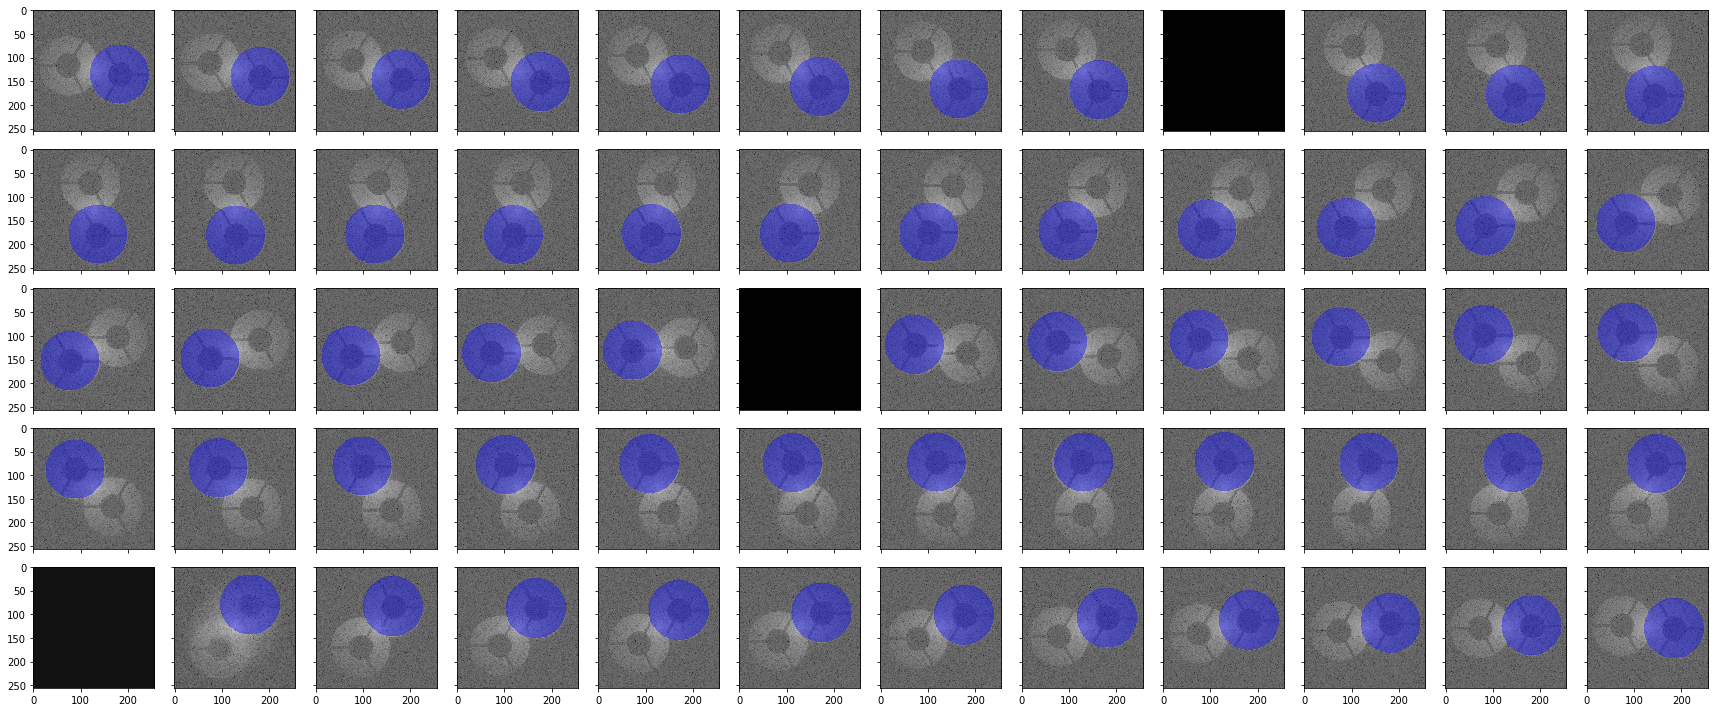

In [7]:
files = holdout_df.file
mae_delta_x = {
    'px': [],  # in pixels
    'um': [],  # in micrometers
}
mae_delta_y = {
    'px': [],  # in pixels
    'um': [],  # in micrometers
}
mae_r = {
    'px': [],  # in pixels
    'um': [],  # in micrometers
}

for file in tqdm(files[:1], desc='Files completed', total=len(files)):
    # Get predictions
    discs, r, discs_raw = p.get_disc(
        tiff_path=file,
        visualize=True,
        _no_tqdm=True, 
        calibrate=False,
        warnings=False,
        return_discs_raw=True
    )
    # Get the labels' row
    row = holdout_df[holdout_df.file==file]

    orig = int(row.IMAGESIZE) // 2 - 1
    delta_x = np.array([disc if disc!=0 else [orig, orig] for disc in discs])[:, 0] - orig
    delta_y = np.array([disc if disc!=0 else [orig, orig] for disc in discs])[:, 1] - orig
    #Ignore zero values (corresponding to empty frames)
#     nonzero = (np.array(delta_x) != 0).squeeze() | (np.array(delta_y) != 0).squeeze() & (np.array(r) != 0).squeeze()
    nonzero = np.invert((np.array(delta_x) == 0).squeeze() & (np.array(delta_y) == 0).squeeze()).squeeze()
    # Get ground truth
    delta_x_true, delta_y_true, r_true = get_label(file, holdout_df, return_delta=True)


In [ ]:
# def angle_between(p1, p2):
#     ang1 = np.arctan2(*p1[::-1])
#     ang2 = np.arctan2(*p2[::-1])
#     return np.rad2deg((ang1 - ang2) % (2 * np.pi))

# for disc in discs_raw:
#     if disc == 0:
#         print(0)
#         continue
#     ref = [1, 0]
    
#     d0 = [disc[0][0] - orig, orig - disc[0][1]]
# #     do = dot(ref, d0)
# #     de = det(ref, d0)
# #     angle = np.arctan2(de, do)
#     angle = angle_between(ref, d0)
    
#     d1 = [disc[1][0] - orig, orig - disc[1][1]]
# #     do = dot(ref, d1)
# #     de = det(ref, d1)
# #     angle1 = np.arctan2(de, do)
#     angle1 = angle_between(ref, d1)

#     print(angle, angle1)
# #     print(np.rad2deg(angle), np.rad2deg(angle1))

In [8]:
abs(abs(np.array(delta_x).squeeze()[nonzero]) - abs(delta_x_true[nonzero])).mean()

0.3684135096737677

In [17]:
nonzero

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [8]:
list(zip(delta_y.tolist(), delta_y_true.tolist()))

[(9.608989715576172, 9.801843624243695),
 (14.977256774902344, 15.448923406752888),
 (20.71263885498047, 20.93674489963313),
 (25.38007354736328, 26.205182382207955),
 (30.673561096191406, 31.19651375092684),
 (35.476356506347656, 35.856052934810876),
 (40.057926177978516, 40.13274904749015),
 (42.81798553466797, 43.97974571139798),
 (0.0, 47.354894426048766),
 (49.36890411376953, 50.221216355829526),
 (51.64578628540039, 52.54730747786114),
 (53.136375427246094, 54.30768265104478),
 (53.74995040893555, 55.483054836600864),
 (55.073097229003906, 56.060546410901985),
 (53.73493576049805, 56.03383025541223),
 (54.213539123535156, 55.40319907792186),
 (52.97493362426758, 54.175562205579496),
 (51.14936447143555, 52.36436988485809),
 (49.078765869140625, 49.98946591783979),
 (46.54330062866211, 47.07687024936787),
 (43.74516677856445, 43.65849388708594),
 (39.315040588378906, 39.771789277760384),
 (35.26045608520508, 35.45933997043623),
 (30.40930938720703, 30.76839406216253),
 (25.5330276

# Errors

In [ ]:
# FRCNN on Obscuration Data
prefix = 'errors/data'

for size in [64, 128, 256, 512]:
    pre_mae_delta = pickle.load(open(f'{prefix}_{size}/preprocessed/mae_delta.pkl', 'rb'))
    raw_mae_delta = pickle.load(open(f'{prefix}_{size}/raw/mae_delta.pkl', 'rb'))
    
    